In [1]:
import numpy as np

In [1]:
# max (my time to kill opp) - (opp time to kill me)
# s.t constraints...
#
# How to solve time to kill opp and vice versa? it's non linear root search

In [4]:
import os, sys

In [23]:
import pandas as pd

In [28]:
pd.read_csv('/Users/andingo/Desktop/LoL_Optimizer/base_stats.csv').T

,0,1,2,3
Champion,Aatrox,Ahri,Akali,Alistar
Health,537.8,514.4,587.8,613.36
dHealth,85,80,85,106
HealthRegen,6.59,6.505,8.34,8.675
dHealthRegen,0.5,0.6,0.65,0.85
Mana_Type,Health,Mana,Energy,Mana
Mana,NaN,334,200,278.84
dMana,NaN,50,0,38
ManaRegen,NaN,6,50,8.5
dManaRegen,NaN,0.8,0,0.8


In [ ]:
# max_m min_o (t2k_opp - t2k_me)

In [ ]:
# All abilities of each champion return a dict with keys
# {'physical','magical','true','heal','armor','mr','ad','ap',...}
# This dict describes the effect of the ability.
#
# Damage dealt = 

def dmg_reduction(defense):
    if defense >= 0:
        return 100. / (100. + defense)
    else:
        return (2. - 100./(100. - defense))

class Champion(object):
    hp # health
    hr # health regen per 5
    energy # remaining energy
    mana # remaining mana
    mp5 # mana regen per 5
    rage # amount of rage
    atk_type # melee or range
    rng # attack range
    ad # attack damage
    as # attack speed
    armor # armor
    mr # magic resistance
    spd # movement speed
    ap # ability power
    vamp # spell vamp
    lfstl # life steal
    cdr # cooldown reduction
    cs # critical strike chance
    
# max obj_stat
# s.t stats in constraint set
#
# ex 1:
# pick level for our champion
# max (damage dealt to enemy with given armor and mr over t seconds)
# s.t life_steal >= life_steal_lb_param
#     spd >= spd_lb
#     gld <= gld_ub
#     sum of ability levels <= player_level
# over set of items and skill leveling
# 
# damage dealt is a linear function of the players stats and the level of the abilities and 
# is predetermined based on the amount of time fighting and the player's level as well as the
# enemy's defensive statistics
# 
# ex 2:
# this may not be tractable
# 
# min (fighting time until opponent is dead)
# s.t ...
# 
# of course this could be done by a root search on the ex 1 problem

In [34]:
from django.shortcuts import render

In [39]:
import bs4
import urllib2

In [73]:
block.findAll('a')[0]['href']

'/players/A/AzumJe00.htm'

In [78]:
block.text.split('\n')

[u'', u'Jerry Azumah            DB        1999-2005', u'']

In [91]:
BASE_URL = 'http://www.pro-football-reference.com/players/'
dic = {'First':[],'Last':[],'Pos':[],'Started':[],'Ended':[],'Link':[]}
for i in range(65,65+26):
    letter = chr(i)
    url = BASE_URL + letter
    soup = bs4.BeautifulSoup(urllib2.urlopen(url).read(), 'lxml')
    blocks = soup.findAll('blockquote')
    for block in blocks:
        links = block.findAll('a')
        links = map(lambda line: line['href'][11:-4], links)
        
        lines = block.text.split('\n')
        k = 0
        for line in lines:
            li = filter(lambda x: x!=u'', line.split(' '))
            if li == []:
                continue
            dic['Link'].append(links[k])
            dic['First'].append(li[0])
            dic['Pos'].append(li[-2])
            st, en = li[-1].split('-')
            dic['Started'].append(int(st))
            dic['Ended'].append(int(en))
            last = ' '.join(li[1:len(li)-2])
            dic['Last'].append(last)
            k += 1           

In [92]:
table = pd.DataFrame(dic)

In [105]:
table[(table.Ended>=2014) & ([any([p in P for p in ('QB','WR','RB','TE','K')]) for P in table.Pos])]\
.set_index('Link').to_csv('/Users/andingo/Desktop/GMLeague/players.csv')

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

In [109]:
import numpy as np

[ 1.          1.95        2.8525      3.709875    4.52438125  5.29816219
  6.03325408  6.73159137  7.39501181  8.02526122]


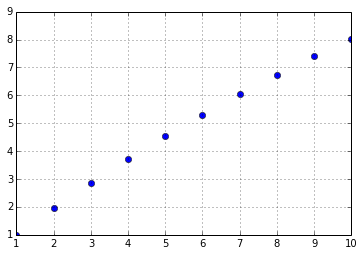

In [130]:
T = np.arange(1,11)
e = .05
S = np.ones(len(T))
for i in range(len(S)-1):
    S[i+1] = 1 + (1-e)*S[i]
print S
plt.plot(T, S, 'o')
plt.grid()
plt.show()

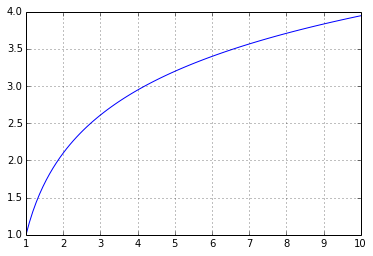

In [123]:
X = np.linspace(1,10,100)
c = 2
plt.plot(X, np.log(c*(X-1)+1)+1)
plt.grid()
plt.show()